In [3]:
%load_ext lab_black

In [2]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-17 12:58:31--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.26MB/s    in 1.1s    

2022-09-17 12:58:32 (1.26 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
df.ocean_proximity.nunique()

5

# Q1

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
import seaborn as sns

In [12]:
from matplotlib import pyplot as plt

In [13]:
df_melted = df.melt(var_name="column")

/home/vladislav/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vladislav/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


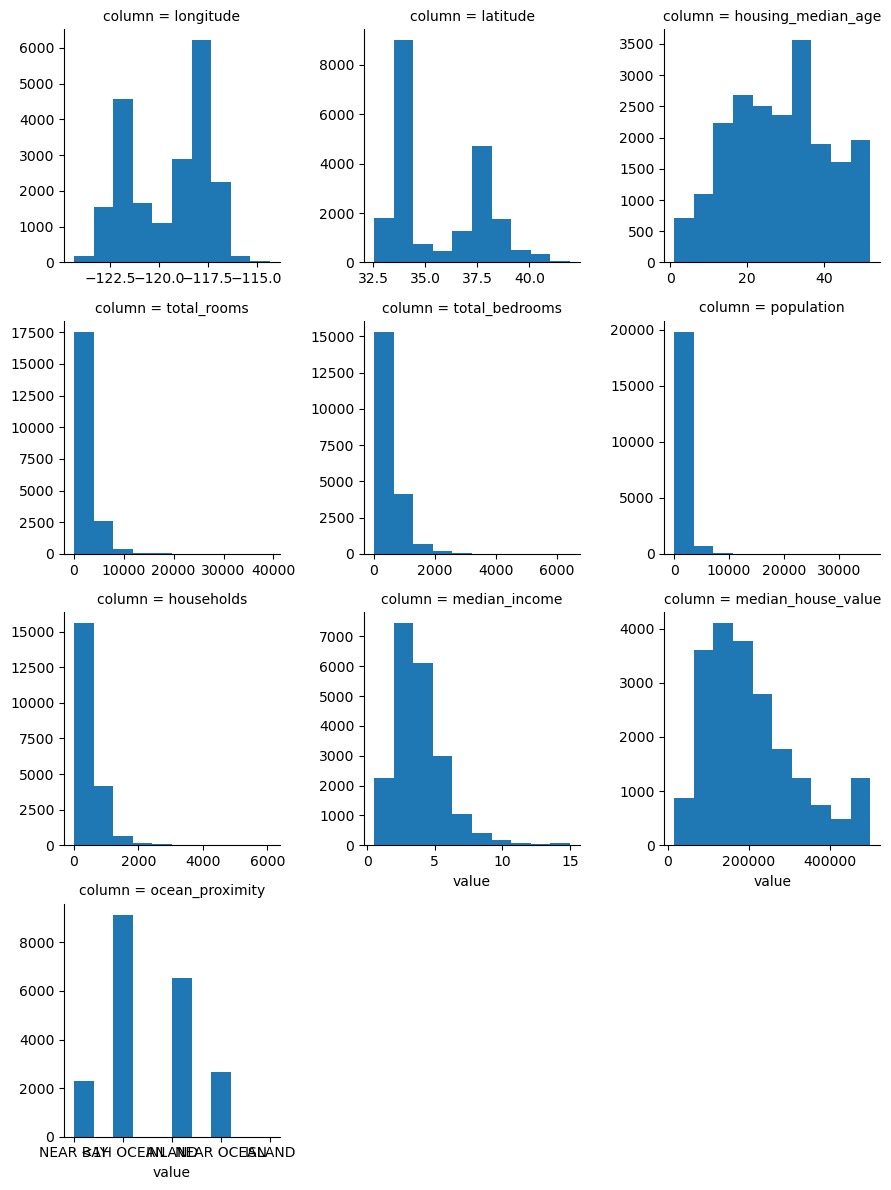

In [14]:
g = sns.FacetGrid(
    df_melted,
    col="column",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
g.map(plt.hist, "value")

In [15]:
df = df[
    [
        "latitude",
        "longitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income",
        "median_house_value",
    ]
]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

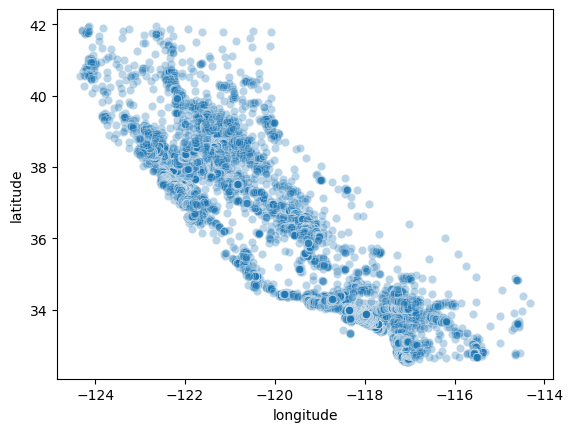

In [122]:
sns.scatterplot(
    data=df[["latitude", "longitude"]], y="latitude", x="longitude", alpha=0.3
)

# Q2

In [17]:
df.population.median()

1166.0

In [52]:
import numpy as np

In [53]:
idx = np.arange(len(df))

In [54]:
np.random.seed(42)
np.random.shuffle(idx)

In [55]:
n_train = int(0.6 * len(df))
n_val = int(0.2 * len(df))
n_test = int(0.2 * len(df))

In [151]:
df_shuffled = df.iloc[idx]

In [152]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

In [153]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

In [154]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [156]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [95]:
%matplotlib inline

(array([2.000e+00, 7.000e+00, 2.800e+01, 3.900e+02, 9.740e+02, 1.834e+03,
        2.686e+03, 2.896e+03, 2.054e+03, 1.513e+03]),
 array([ 9.61580548,  9.96646167, 10.31711786, 10.66777405, 11.01843024,
        11.36908643, 11.71974262, 12.07039881, 12.421055  , 12.77171119,
        13.12236738]),
 <BarContainer object of 10 artists>)

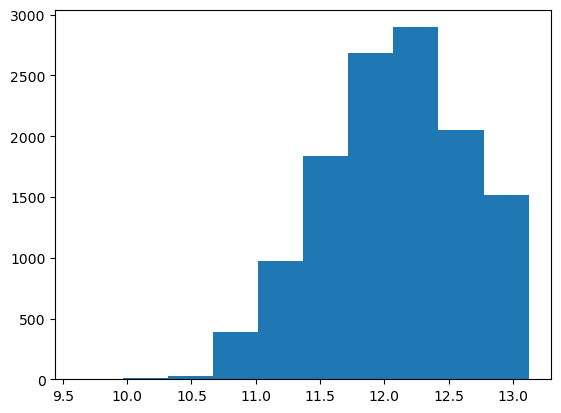

In [96]:
plt.hist(y_train)

In [128]:
total_bedrooms_mean = df_train.total_bedrooms.mean()

In [157]:
X_train_mean = df_train.fillna(total_bedrooms_mean).values
X_val_mean = df_val.fillna(total_bedrooms_mean).values
X_test_mean = df_test.fillna(total_bedrooms_mean).values

In [158]:
X_train_zero = df_train.fillna(0).values
X_val_zero = df_val.fillna(0).values
X_test_zero = df_test.fillna(0).values

In [159]:
# https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [160]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

# Q3

In [161]:
w_0, w = train_linear_regression(X_train_mean, y_train)

In [162]:
y_pred = w_0 + X_train_mean.dot(w)
print("train:", round(rmse(y_train, y_pred), 4))

train: 0.341


In [163]:
y_pred = w_0 + X_val_mean.dot(w)
print("val:", round(rmse(y_val, y_pred), 4))

val: 0.329


In [164]:
w_0, w = train_linear_regression(X_train_zero, y_train)
y_pred = w_0 + X_train_zero.dot(w)
print("train:", round(rmse(y_train, y_pred), 4))

train: 0.3413


In [165]:
y_pred = w_0 + X_val_zero.dot(w)
print("val:", round(rmse(y_val, y_pred), 4))

val: 0.3295


In [166]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

# Q4

In [167]:
# doesn't match any options
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print(f"r={r}")
    w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w_0 + X_train_zero.dot(w)
    print("train:", round(rmse(y_train, y_pred), 4))
    y_pred = w_0 + X_val_zero.dot(w)
    print("val:", round(rmse(y_val, y_pred), 4))

r=0
train: 0.3413
val: 0.3295
r=1e-06
train: 0.3413
val: 0.3295
r=0.0001
train: 0.3413
val: 0.3295
r=0.001
train: 0.3413
val: 0.3295
r=0.01
train: 0.3413
val: 0.3295
r=0.1
train: 0.3415
val: 0.3297
r=1
train: 0.3452
val: 0.3338
r=5
train: 0.3502
val: 0.3392
r=10
train: 0.3514
val: 0.3406


# Q5

In [173]:
def prepare_Xy_train_val(df, seed):
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_train = int(0.6 * len(df))
    n_val = int(0.2 * len(df))
    n_test = int(0.2 * len(df))

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val :].copy()

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]

    X_train_zero = df_train.fillna(0).values
    X_val_zero = df_val.fillna(0).values
    X_test_zero = df_test.fillna(0).values

    return X_train_zero, y_train, X_val_zero, y_val, X_test_zero, y_test

In [174]:
rmse_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print(f"seed {seed}")
    X_train_zero, y_train, X_val_zero, y_val, _, _ = prepare_Xy_train_val(df, seed=seed)
    w_0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w_0 + X_val_zero.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print("val: ", round(rmse_val, 8))
    rmse_list.append(rmse_val)

seed 0
val:  0.33884305
seed 1
val:  0.33623873
seed 2
val:  0.33209123
seed 3
val:  0.34051536
seed 4
val:  0.33890241
seed 5
val:  0.34348667
seed 6
val:  0.3451981
seed 7
val:  0.33959899
seed 8
val:  0.34662309
seed 9
val:  0.33659261


In [175]:
round(np.std(rmse_list), 3)

0.004

# Q6

In [180]:
X_train.shape

(12384, 8)

In [181]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_Xy_train_val(df, seed=9)
X_train_val = np.concatenate([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_train_zero, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print("test:", rmse(y_test, y_pred))

test: 0.3457016103018568
